In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


2992 1776


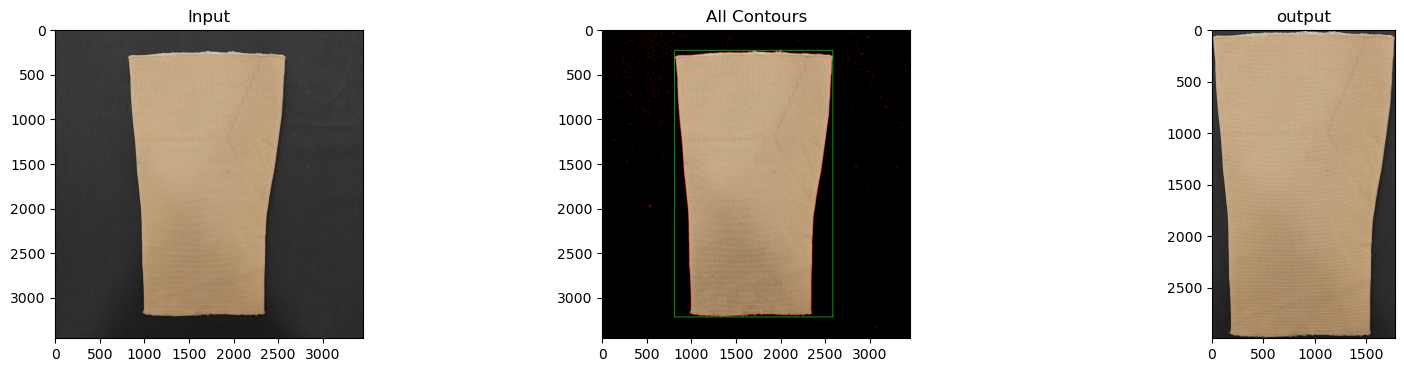

In [19]:

image = cv2.imread("image2.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# red color boundaries [B, G, R]
lower = [np.mean(image[:, :, i] - np.std(image[:, :, i])/3) for i in range(3)]
upper = [250, 250, 250]

# create NumPy arrays from the boundaries
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

# find the colors within the specified boundaries and apply
mask = cv2.inRange(image, lower, upper)
output = cv2.bitwise_and(image, image, mask=mask)

ret, thresh = cv2.threshold(mask, 40, 255, 0)

contours, hierarchy = cv2.findContours(
       thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

if len(contours) != 0:
        # draw in blue the contours that were founded
        cv2.drawContours(output, contours, -1, 255, 3)

        # find the biggest countour (c) by the area
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        # draw the biggest contour (c) in green
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 5)

foreground = image[y:y+h, x:x+w]
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1), plt.imshow(image), plt.title("Input")
plt.subplot(1, 3, 2), plt.imshow(
    output), plt.title("All Contours")
plt.subplot(1, 3, 3), plt.imshow(
    foreground), plt.title("output")
scaling_factor = 0.005283
camera_height = 1
h = int(np.array(foreground.shape)[0] * scaling_factor)
w = int(np.array(foreground.shape)[1] * scaling_factor)
print(h,w)
plt.show()
